In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import seaborn as sns

In [311]:
popFrame = pd.read_csv("world_population.csv",index_col="Country Name")
bandFrame = pd.read_csv("metal_bands.csv")
bandFrame["formed"] = bandFrame["formed"].replace('-',"2017")
bandFrame["formed"] = bandFrame["formed"].apply(pd.to_numeric)

In [312]:
popFrame = popFrame.dropna()



In [313]:
popFrame.loc["Aruba"]["1960"]

54208.0

## Adding population column to band frame

In [314]:
bandFrame["population"] = np.nan
for index,row in bandFrame.iterrows():
    origin = row["origin"]
    year = str(row["formed"])
    
    if (origin in popFrame.index.array) and (year in popFrame.columns.array):
        
        #print(popFrame.loc[origin][year])
        bandFrame.at[index,"population"] = popFrame.loc[origin,year]
        #row["population"] = popFrame.loc[origin][year]
    else:
        #bandFrame.at[index,"population"] = np.nan
        bandFrame.at[index,"population"] = np.nan

In [315]:
print("Aruba" in popFrame.index.array and "1960" in popFrame.columns.array )
#print(popFrame.columns.array)

True


In [316]:
bandFrame

,Unnamed: 0,band_name,fans,formed,origin,split,style,population
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy",56225800.0
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",8558835.0
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash",229466000.0
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock",233792000.0
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death,8436489.0
...,...,...,...,...,...,...,...,...
4945,4945,Atara,0,2006,France,2006,"Black,Grindcore",63621376.0
4946,4946,Avicularia,0,2003,Croatia,-,Avantgarde death,4440000.0
4947,4947,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive",60846820.0
4948,4948,Axatak,0,1983,Australia,1988,"Hard rock,Heavy",15369000.0


# Wo, Wann und welcher Style war am besten?

In [317]:
wannWo = pd.DataFrame()
years = np.unique(bandFrame["formed"])
origins = bandFrame["origin"].unique()


wannWo["origins"] = origins
for year in years:
    wannWo[year] = 0   
wannWo = wannWo.set_index("origins")

# series = bandFrame.groupby("formed").origin.value_counts()
    
# for origin, amount in series.items():
#     print(f"Index : {origin}, Value : {amount}")
bandFrame

,Unnamed: 0,band_name,fans,formed,origin,split,style,population
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy",56225800.0
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",8558835.0
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash",229466000.0
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock",233792000.0
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death,8436489.0
...,...,...,...,...,...,...,...,...
4945,4945,Atara,0,2006,France,2006,"Black,Grindcore",63621376.0
4946,4946,Avicularia,0,2003,Croatia,-,Avantgarde death,4440000.0
4947,4947,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive",60846820.0
4948,4948,Axatak,0,1983,Australia,1988,"Hard rock,Heavy",15369000.0


In [318]:
bandFrame = bandFrame[bandFrame["origin"] != "United Kingdom, USA"]
#bandFrame = bandFrame[bandFrame['population'].notna()]
wannWo

,1964,1965,1967,1968,1969,1970,1971,1972,1973,1974,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
origins,,,,,,,,,,,,,,,,,,,,,
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sweden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
USA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Finland,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Germany,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Swaziland,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Italy, Spain",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Venezuela,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [319]:
dicti = {}
for index,row in bandFrame.iterrows():
    origin = row["origin"]
    year = row["formed"]
    if row["split"] == "-":
        years = abs(row["formed"]-2017)
    else:
        years = abs(row["formed"]-pd.to_numeric(row["split"]))

    if years == 0:
        if (row["formed"],row["origin"]) in dicti:

            value = dicti[(row["formed"],row["origin"])]
            fans = value[0]
            population = value[1]

            fans += row["fans"]
            #bands += 1
            dict_tuple = (fans,row["population"])
            dicti[(row["formed"],row["origin"])] = dict_tuple
        else:
            dicti[(row["formed"],row["origin"])] = row["fans"], row["population"]
    else:  
        for x in range(row["formed"],row["formed"]+years):
            if (x,row["origin"]) in dicti:

                value = dicti[(row["formed"],row["origin"])]
                fans = value[0]
                bands = value[1]
                
                fans += row["fans"]
                #bands += 1
                dict_tuple = (fans,row["population"])
                dicti[(row["formed"],row["origin"])] = dict_tuple
            else:
                dicti[(x,row["origin"])] = row["fans"] , row["population"]
    
    
    #print(dicti[row["formed"],row["origin"]])
    

print(dicti[(1975,"United Kingdom")])
#print(dicti.keys())

(6288, 56225800.0)


In [320]:
for index,row in wannWo.iterrows():
    for year in wannWo.columns:
        if (year,index) in dicti:

            
            if dicti[(year,index)][0] != 0:
                row[year] = dicti[(year,index)][0]
            else: row[year] = 0

In [321]:
for years in wannWo.columns:
    idx = (wannWo[years].argmax)
    print(idx)
    break


<bound method IndexOpsMixin.argmax of origins
United Kingdom        0
Sweden                0
USA               14118
Finland               0
Germany               0
                  ...  
Swaziland             0
Italy, Spain          0
Venezuela             0
Poland, Sweden        0
Greenland             0
Name: 1964, Length: 114, dtype: int64>


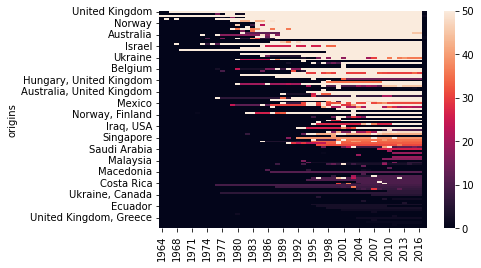

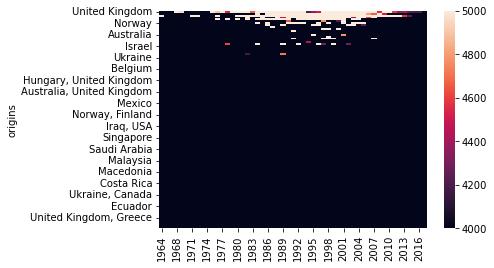

In [322]:
sns.heatmap(data=wannWo,robust = True,vmin=0, vmax=50)

#fans/Einwohner
plt.show()
plt.close()
sns.heatmap(data=wannWo,robust = True,vmin=4000, vmax=5000)
plt.show()
plt.close()

In [323]:
print(wannWo.max().idxmax())

print(wannWo.idxmax().max())
wannWo

1981
United Kingdom


,1964,1965,1967,1968,1969,1970,1971,1972,1973,1974,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
origins,,,,,,,,,,,,,,,,,,,,,
United Kingdom,0,0,1950,112563,4956,2307,2307,2307,2395,2479,...,4556,5110,5302,4575,4363,4441,4223,4201,4195,1
Sweden,0,0,0,0,0,0,0,0,0,0,...,11695,4509,3565,3637,3551,3856,3150,3062,3056,0
USA,14118,362,506,375,362,362,6066,25097,415,362,...,8317,6222,5760,5306,5084,4572,4230,3771,3737,2
Finland,0,0,0,0,0,0,0,0,0,0,...,3706,2697,2394,2295,2216,2791,2153,2157,2153,0
Germany,0,519,0,601,0,0,0,0,0,0,...,2675,3461,2392,2253,2095,2430,2271,2145,2048,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Swaziland,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Italy, Spain",0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
Venezuela,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,0


In [324]:
newFrame = bandFrame.copy()
newFrame = newFrame[newFrame["origin"]=="United Kingdom"]
#newFrame = newFrame[newFrame["formed"]=="United Kingdom"]


In [334]:
biggest_styles = newFrame.copy()
biggest_styles["style"] = biggest_styles["style"].map(lambda x: x.split(","))

all_styles = {}
for index, row in biggest_styles.iterrows():
    
    for item in row["style"]:

        if item in all_styles:
            all_styles[item] += 1
        else:
            all_styles[item] = 1
            
sorted_x = sorted(all_styles.items(), key=lambda kv: kv[1])
styles=[]
other = 0
for x in range(len(sorted_x)-1,len(sorted_x)-25,-1):
    styles.append((sorted_x[x][0]))
print(styles)

['Heavy', 'Doom', 'Death', 'New wave of british heavy', 'Black', 'Hard rock', 'Progressive', 'Thrash', 'Atmospheric black', 'Power', 'Grindcore', 'Sludge', 'Stoner', 'Folk', 'Brutal death', 'Gothic', 'Punk', 'Melodic death', 'Death doom', 'Technical death', 'Progressive rock', 'Blackened death', 'Post-metal', 'Metalcore']


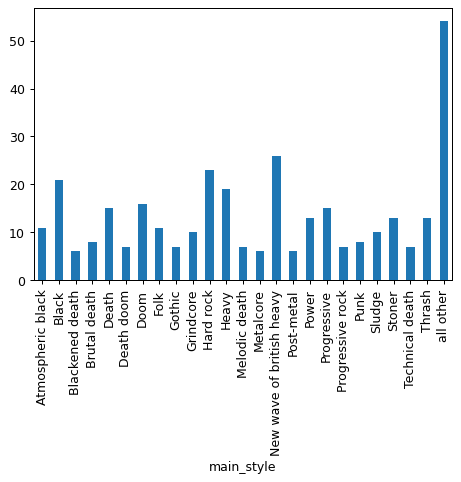

In [343]:
frame = newFrame.copy()

#frame = frame[frame["origin"] == "Sweden"]
#eval_frame = pd.DataFrame()
#uniques = newFrame["band_name"].unique()
#eval_frame["band_name"] = frame["band_name"]
#eval_frame = eval_frame.set_index("band_name")
frame["style"] = frame["style"].map(lambda x: x.split(","))




for style in styles:  
    frame[style] = frame["style"].apply(lambda x: True if style in x else False)
    
frame["main_style"] = "all other"
for index,row in frame.iterrows():
    for style in styles:
        if row[style] == True:
            frame.at[index,"main_style"] = style
plt.figure(dpi=90)
frame.groupby("main_style").size().plot(kind="bar")
plt.show()

In [ ]:
frame =frame[frame["origin"]=="United Kingdom"]


In [ ]:
#frame.groupby("main_style").size().plot(kind = "bar")